# Linear regression
This notebook introduces linear regression, implementing each of the examples we saw in the course.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# EXAMPLE: Predict house price (Gijón)
# Generate N data instances
N = 100
x = np.random.uniform(50, 200, size=N)
y = [1500*i + np.random.normal(0,i*200) for i in x] # Gijón
y = [np.max([i,8]) for i in y]

# Transform the data to numpy format for sklearn
x = np.array(x).reshape(x.shape + (1,)) # x is one-dimensional and sklearn requires matrix data, so we add one dimension
y = np.array(y)


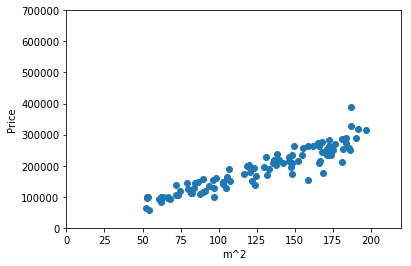

In [4]:
# EXAMPLE: Predict house price (Gijón): plot
# Preplot
fig = plt.figure()
ax = fig.gca()

# Plot the data points
ax.scatter(x, y, label='data')

plt.xlabel('m^2')
plt.ylabel('Price')
ax.set_xlim(0,220)
ax.set_ylim(0,700000)
#ax.legend()

plt.show()

In [5]:
# EXAMPLE: Predict house price (Gijón): estimate model
# Train linear regression model
from sklearn.linear_model import LinearRegression

# This works the same way for all supervised learning algorithms in scikit-learn: create an object and call fit
lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)
w = lr.coef_

print 'Estimated coefficient: {}'.format(w)

Estimated coefficient: [ 1491.18206116]


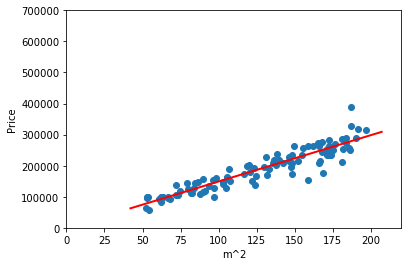

In [7]:
# EXAMPLE: Predict house price (Gijón)
# Plot
fig = plt.figure()
ax = fig.gca()

# Plot the data points
ax.scatter(x, y, label='data')

# Compute the estimated function to plot it as a line
xb = [np.min(x)-10, np.max(x)+10]
z = [w*xb[0], w*xb[1]]

ax.plot(xb, z, label='pred', color='red', linewidth=2)
plt.xlabel('m^2')
plt.ylabel('Price')
ax.set_xlim(0,220)
ax.set_ylim(0,700000)
#ax.legend()

plt.show()

#plt.savefig('../pres/images/lr_weight_1v_pred.pdf')

In [8]:
# EXAMPLE: Predict house price (Gijón)
# Predict random samples
x = np.random.rand(1)*200
print 'm^2: {}. Predicted price: {}'.format(x, w*x)

m^2: [ 97.84810632]. Predicted price: [ 145909.34086914]


In [9]:
# EXAMPLE: predict house price (Madrid)
# Generate N data instances
N = 100
x = np.random.uniform(50, 200, size=N)
y = [2000*i + 100000 + np.random.normal(0,i*300) for i in x]

# Transform the data to numpy format for sklearn
x = np.array(x).reshape(x.shape + (1,)) # x is one-dimensional and sklearn requires matrix data, so we add one dimension
y = np.array(y)

In [10]:
# EXAMPLE: predict house price (Madrid)
# Train linear regression model

lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)
w = lr.coef_
b = lr.intercept_

print 'Estimated coefficients: {}, {}'.format(w,b)

Estimated coefficients: [ 1990.6034534], 98836.606382


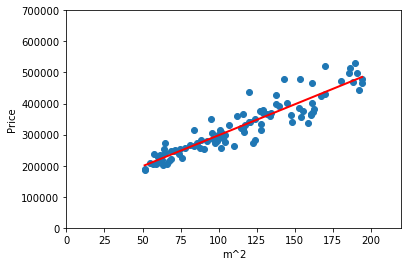

In [11]:
# EXAMPLE: predict house price (Madrid)
# Plot

fig = plt.figure()
ax = fig.gca()

ax.scatter(x, y, label='data')

# Compute the predicted function to plot it as a line
xb = [np.min(x), np.max(x)]
z = [w*xb[0]+b, w*xb[1]+b]

ax.plot(xb, z, label='pred', color='red', linewidth=2)
plt.xlabel('m^2')
plt.ylabel('Price')
ax.set_xlim(0,220)
ax.set_ylim(0,700000)
#ax.legend()

plt.show()

#plt.savefig('../pres/images/lr_madrid_1v_pred.pdf')

In [12]:
# EXAMPLE: Predict house price with 2 variables
# Generate data
N = 100
x1 = np.random.uniform(50, 200, size=N)
x2 = np.random.uniform(0, 75, size=N)
y = [2000*i - 1000*j + np.random.normal(0,i*j*10) for i,j in zip(x1,x2)]

# Transform the data to numpy format for sklearn
x = np.column_stack([x1, x2])
y = np.array(y)


In [13]:
# EXAMPLE: Predict house price with 2 variables
# Train linear regression model
lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)
w = lr.coef_
b = lr.intercept_
print 'Estimated coefficients: {}, {}'.format(w,b)

Estimated coefficients: [ 2103.54758026 -1410.02459286], -7056.38434719


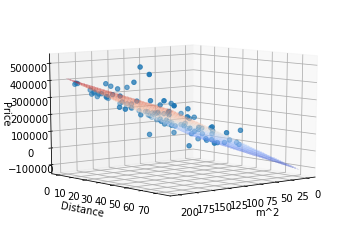

In [15]:
# EXAMPLE: Predict house price with 2 variables
# Plot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Build the surface
X = np.arange(1, 200, 1)
Y = np.arange(0, 75, 1)
X, Y = np.meshgrid(X, Y)
z_pred = w[0]*X + w[1]*Y + b

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, z_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.1, edgecolor=(0,0,0,0)) # Set edgecolor to avoid black edge bug when saving surface to PDF

plt.xlabel('m^2')
plt.ylabel('Distance')
ax.set_zlabel('Price')

ax.scatter(x1, x2, y)
ax.view_init(elev=10, azim=50) #axim=20,80

plt.show()
#plt.savefig('../pres/images/lr_2v.pdf')


In [22]:
# Predict random samples
x1 = np.random.rand(1)*200+20
x2 = np.random.rand(1)*100
print 'm^2: {}, distance to centre: {}. Predicted price: {}'.format(x1, x2, w[0]*x1+w[1]+x2+b)

m^2: [ 111.51740348], distance to centre: [ 17.58838811]. Predicted price: [ 226133.34369184]


In [23]:
# Estimate coefficients manually. 
# This is the formula we got after deriving the error function with respect to the coefficients

# First, add a column of ones to X to estimate the bias
xe = np.column_stack([x,np.ones(x.shape[0])])
# then compute the estimate with the normal equations
w = np.linalg.inv(xe.T.dot(xe)).dot(xe.T.dot(y))
w

array([ 2103.54758026, -1410.02459286, -7056.38434719])

In [24]:
# EXAMPLE: predict house price only from distance
# Generate data
N = 100
x = np.random.uniform(0, 150, size=N)
y = [50*(i-60)**2 + 50000 + np.random.normal(0,50000) for i in x]
y = [np.max([i,40000+np.random.normal(0,1000)]) for i in y]

# Transform the data to numpy format for sklearn
x = np.array(x).reshape(x.shape + (1,)) # x is one-dimensional and sklearn requires matrix data, so we add one dimension
# Add new variable (feature engineering)
x2 = x**2
x_aug = np.column_stack([x,x2])
y = np.array(y)

Estimated coefficients: [-5649.72152663    47.88962529], 226006.277826


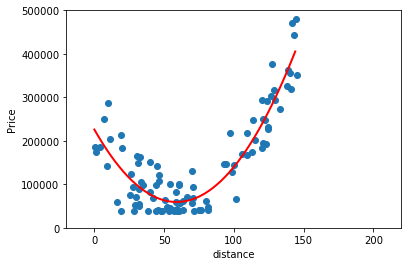

In [25]:
# EXAMPLE: predict house price only from distance

# Train linear regression model
lr = LinearRegression(fit_intercept=True)
lr.fit(x_aug, y)
w = lr.coef_
b = lr.intercept_

print 'Estimated coefficients: {}, {}'.format(w,b)

fig = plt.figure()
ax = fig.gca()

ax.scatter(x, y, label='data')

# Compute the predicted function to plot it as a line
xb = np.arange(int(np.min(x)), int(np.max(x)))
z = [w[0]*i + w[1]*i**2 + b for i in xb]

ax.plot(xb, z, label='pred', color='red', linewidth=2)

plt.xlabel('distance')
plt.ylabel('Price')
ax.set_xlim(-20,220)
ax.set_ylim(-20,500000)
#ax.legend()

plt.show()

#plt.savefig('../pres/images/lr_quad_pred.pdf')

In [57]:
# Predict random samples
x = np.random.rand(1)*200
print 'Distance: {}. Predicted price: {}'.format(x, w[0]*x+w[1]*x**2+b)

Distance: [ 0.19372564]. Predicted price: [ 224913.57916417]


In [88]:
def extend_dataset(X, degree=1):
    """
    This function extends the given data set with entries corresponding to powers of the original entries.
    High-order interactions are omitted to avoid combinatorial explosion. Remember, we could also add new features
    of the form x_1*x_2, x_1*x_3 (where x_i is the value of feature i), but this would result in way too many
    features. You can try adding a random number of such interactions and try various models to see what works best
    """
    X_aug = X
    for i in range(2, degree+1):
        X_aug = np.column_stack([X_aug,x**i])
    return X_aug

In [89]:
def standardize(x, mean=None, std=None):
    """
    This function transforms the input data to make sure variables are mean-centered and have unit-variance.
    Remember: variables could come in very different scales, which can negatively affect learning.    
    """
    if mean is None:
        mean = np.mean(x, axis=0)
    if std is None:
        std = np.std(x, axis=0)
    x = (x-mean)/std
    return x, mean, std

# Overfitting and regularization
Here we introduce overfitting. When a model is complex enough, it can represent the idiosynchrasies of the data, such as noise and outliers, which will most likely hurt predictions on new data.

To combat this undesirable phenomenon, we can introduce regularizing penalties. Ridge regression and the LASSO are two ways of achieving this with linear regression.

In [106]:
def get_cv_split(X, current_split, count=10):
    """
    This function generates a list of train and test indices for a CV split
    """
    if current_split >= count:
        raise ValueError('Current_split must be smaller than count')
    N = X.shape[0]
    split_size = int(N/float(count))
    split = []
    test = np.arange(current_split*split_size, np.min([(current_split+1)*split_size, N]))
    train = np.delete(np.arange(N), test)
    return train, test

In [107]:
def rmse(y, pred):
    """
    This function computes the root mean squared error between the given samples
    """
    return np.sqrt(np.sum((preds-y)**2)/len(y))

In [112]:
########################################
# Generate data
# Examples: Overfitting, ridge, lasso
N = 100
X = np.random.uniform(50, 200, size=N)
y = [1000*i + np.random.normal(0,i*200) for i in X]

# Create a new feature vector with powers up to DEGREE
DEGREE=18
x_aug = extend_vector(X, DEGREE)
    
# Transform the data to numpy format for sklearn
#X = np.array(X).reshape(X.shape + (1,)) # x is one-dimensional and sklearn requires matrix data, so we add one dimension
y = np.array(y)

# Standardize
#x = (x-np.mean(x))/np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)
y = (y-y_mean)/y_std

x_aug, x_aug_mean, x_aug_std = standardize(x_aug)

In [166]:
# Train linear regression model
# Note how the resulting coefficients are very high if we use high dimensional polynomial feature vectors
lr = LinearRegression(fit_intercept=True)
lr.fit(x_aug, y)
w = lr.coef_
b = lr.intercept_

print 'Estimated coefficients: {}, {}'.format(w,b)

Estimated coefficients: [ -4.66190285e+07   8.76967325e+08  -8.24230978e+09   5.02488029e+10
  -2.17919513e+11   6.99971939e+11  -1.69080231e+12   3.05722648e+12
  -4.00072935e+12   3.37741777e+12  -8.63437986e+11  -2.24373638e+12
   3.97679024e+12  -3.59481000e+12   2.07890663e+12  -7.76545382e+11
   1.72129199e+11  -1.72981863e+10], 0.000598261075103


In [167]:
# Predict random data
# The predictions of an overfitted model are ok within the range of the training data
# but very bad for anything else
x_test = np.random.uniform(50, 250)
xe = extend_vector(x_test, DEGREE)
xe = (xe-x_aug_mean)/x_aug_std
print x_test, lr.predict(xe)*y_std+y_mean

207.77901817 [-15565761.49068777]


In [288]:
# Generate test data to demonstrate the effect of overfitting
x_test = np.random.uniform(50, 250, size=N)
y_test = [1000*i + np.random.normal(0,i*200) for i in X]
yt_mean = np.mean(y_test)
yt_std = np.std(y_test)
y_test = (y_test-yt_mean)/yt_std

x_test_aug = extend_vector(x_test, DEGREE)
x_test_aug,_,_ = standardize(x_test_aug, x_aug_mean, x_aug_std)

In [289]:
# Compute RMSE
# With an overfitted model, the error on the training set is fine, but not in the test set
preds = lr.predict(x_aug)*y_std+y_mean
print rmse(y*y_std+y_mean, preds)

preds = lr.predict(x_test_aug)*y_std+y_mean
print rmse(y_test*y_std+y_mean, preds)

23829.9356403
717263.701067


In [290]:
########################################
# Cross validation
########################################
# A basic example of CV. Remember: in oder to know how well our model will do in the wild, we need to take apart
# a test split, which is not used for training. In k-fold CV, we make k such splits. For each split, we train on one
# bit of the data and test on the rest. We can then take the mean and standard deviation of the errors and
# tweak the parameters if necessary.
k=4
for i in range(k):
    t = np.arange(N)
    train, test = get_cv_split(t, i, k)
    x_train = x_aug[train,:]
    x_test = x_aug[test,:]
    y_train = y[train]
    y_test = y[test]

    # Fit the model to the train data, then test on the test split
    lr.fit(x_train, y_train)
    
    preds = lr.predict(x_aug)*y_std+y_mean
    print 'Train RMSE: {}'.format(rmse(y*y_std+y_mean, preds))

    preds = lr.predict(x_test)*y_std+y_mean
    print 'Test RMSE: {}'.format(rmse(y_test*y_std+y_mean, preds))

Train RMSE: 23884.7025648
Test RMSE: 21447.5026804
Train RMSE: 24136.2416332
Test RMSE: 33893.3708727
Train RMSE: 23925.3585622
Test RMSE: 18269.6697501
Train RMSE: 24051.8368627
Test RMSE: 23551.631339


In [291]:
# EXAMPLE: Ridge regression
from sklearn.linear_model import Ridge

# Train ridge regression model
# Try going up and generating a test set again, then compute the RMSE
# Try different values of alpha (strength of the regularization). It might take a few tries to get a good model
lr = Ridge(alpha=1, fit_intercept=True)
lr.fit(x_aug, y)
w = lr.coef_
b = lr.intercept_

print 'Estimated coefficients: {}, {}'.format(w,b)

Estimated coefficients: [ 0.6435039   0.26733462  0.06361351 -0.02621161 -0.05601279 -0.06053244
 -0.05730721 -0.0530367  -0.04891198 -0.04389042 -0.03639155 -0.02504553
 -0.00894395  0.01234322  0.03884468  0.07029041  0.10620924  0.14601015], -1.14364986237e-16


In [292]:
#EXAMPLE: Lasso
from sklearn.linear_model import Lasso

# Train Lasso model
# Try going up and generating a test set again, then compute the RMSE
# Try different values of alpha (strength of the regularization). It might take a few tries to get a good model
lr = Lasso(alpha=0.01, fit_intercept=True)
lr.fit(x_aug, y)
w = lr.coef_
b = lr.intercept_

print 'Estimated coefficients: {}, {}'.format(w,b)

Estimated coefficients: [ 0.78573301  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.12800416], -9.38804275485e-17


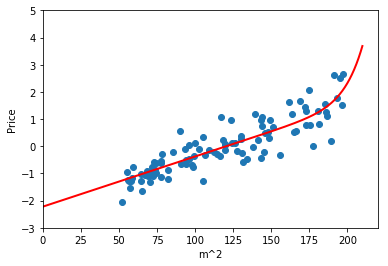

In [293]:
############################################
# PLOTS
# Examples: overfitting, ridge, lasso

fig = plt.figure()
ax = fig.gca()

ax.scatter(X, y, label='data')

# Compute the predicted function to plot it as a line
xb = np.arange(-10,210,0.1)
xb_aug = extend_vector(xb, DEGREE)
xb_aug = (xb_aug-x_aug_mean)/x_aug_std

z = [w.T.dot(i) + b for i in xb_aug]

ax.plot(xb, z, label='pred', color='red', linewidth=2)
plt.xlabel('m^2')
plt.ylabel('Price')
ax.set_xlim(0,220)
ax.set_ylim(-3,5)
#ax.legend()

plt.show()

#plt.savefig(('../pres/images/ridge_p.pdf'))

In [296]:
# Predict random samples
x = np.random.rand(1)*300
x_aug_t = [x]
for i in range(2, DEGREE+1):
    x_aug_t.append(float(x**i))  
x_aug_t = np.array(x_aug_t).astype(np.float)
x_aug_t = (x_aug_t - x_aug_mean)/x_aug_std
print 'Distance: {}. Predicted price: {}'.format(x, (w.T.dot(x_aug_t)+b) * y_std + y_mean)

Distance: [ 255.06957841]. Predicted price: 3674032.25418
